In [ ]:
import cv2
import numpy as np
from imgaug import augmenters as iaa

def aumentarDados(imagem):
    seq = iaa.Sequential([
        #iaa.GaussianBlur(sigma=(0, 1.0)),
        #iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),
        #iaa.Multiply((0.8, 1.2)),
        iaa.GammaContrast((0.2, 0.9)),
        #iaa.Affine(scale=(0.8, 1.2))
    ])
    return seq.augment_image(imagem)

img = cv2.imread("imagem.png")
img_cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imagens_aumentadas = []


for i in range(1):
    img_aumentada = aumentarDados(img_cinza)
    imagens_aumentadas.append(img_aumentada)
    nome_arquivo = "teste/imagem_aumentada_" + str(i+1) + ".png"
    cv2.imwrite(nome_arquivo, img_aumentada)


In [1]:
import cv2
import os
import numpy as np
import random
from joblib import Parallel, delayed
import matplotlib.pyplot as plt


In [ ]:
import cv2

p1 = 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-21.png'

def equalize_histogram(img):
    img_eq = cv2.equalizeHist(img)
    return img_eq


img = cv2.imread(p1, cv2.IMREAD_GRAYSCALE)


img_eq = equalize_histogram(img)
clahe=cv2.createCLAHE(clipLimit=20)
eg=clahe.apply(img_eq)
eqhist_images=np.concatenate((img,eg),axis=1)
plt.figure(figsize=(20,20))
plt.imshow(eqhist_images,cmap="gray")
plt.show()

In [ ]:

ic = cv2.bitwise_not(img)
eqhist_images=np.concatenate((img,ic),axis=1)
plt.figure(figsize=(20,20))
plt.imshow(eqhist_images,cmap="gray")
plt.show()

In [ ]:

img_path = 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-1.png'
img = cv2.imread(img_path)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img/255.0
im_power_law_transformation = cv2.pow(gray_img, 0.6)

plt.figure(figsize=(20,20))
plt.imshow(np.hstack((gray_img*255, im_power_law_transformation*255)),cmap='gray')
plt.show()

In [ ]:
img_eq = cv2.equalizeHist(img)
eg= cv2.GaussianBlur(eg, (5,5), 0)
_, thresh = cv2.threshold(eg, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)

# Threshold eg image to obtain a binary image
_, binary_eg = cv2.threshold(eg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

_, markers = cv2.connectedComponents(binary_eg)
markers = markers + 1
markers[unknown==255] = 0

# Convert eg to 3-channel image
eg = cv2.cvtColor(eg, cv2.COLOR_GRAY2BGR)

markers = cv2.watershed(eg, markers)
eg[markers == -1] = 255

plt.figure(figsize=(10,10))
plt.imshow(eg,cmap="gray")
plt.show()


In [ ]:

image_dir = 'TB_Chest_Radiography_Database/Tuberculosis'
output_dir = 'turberculoseC'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

image_files = os.listdir(image_dir)

for imag_file in image_files:
    imag_P = os.path.join(image_dir,imag_file)
    

    if img is None:
        print("Erro")
        continue

    #img_Red = cv2.resize(img, (0, 0), fx=0.6, fy=0.6)
    #img_g = cv2.GaussianBlur(img_Red, (5, 5), 0)
    #gray = cv2.cvtColor(img_g, cv2.COLOR_BGR2GRAY)
    #thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    #kernel = np.ones((3, 3), np.uint8)
    #opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    #contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    img = cv2.imread(imag_P, cv2.IMREAD_GRAYSCALE)
    eg = cv2.equalizeHist(img)
    clahe=cv2.createCLAHE(clipLimit=5)
    eg=clahe.apply(eg)
    eg= cv2.GaussianBlur(eg, (5,5), 0)
    _, thresh = cv2.threshold(eg, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(thresh, sure_fg)

    # Threshold eg image to obtain a binary image
    _, binary_eg = cv2.threshold(eg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    _, markers = cv2.connectedComponents(binary_eg)
    markers = markers + 1
    markers[unknown==255] = 0

    # Convert eg to 3-channel image
    eg = cv2.cvtColor(eg, cv2.COLOR_GRAY2BGR)

    markers = cv2.watershed(eg, markers)
    eg[markers == -1] = 255

    output_file = os.path.join(output_dir, f'resized_{imag_file}')
    cv2.imwrite(output_file, eg)


    # img_Red=cv2.resize(img,(0,0), fx=0.6, fy=0.6)
    # #plt.imshow(img_Red)
    # img_g= cv2.GaussianBlur(img_Red,(5,5),0)
    # #plt.imshow(img_g)
    # gray = cv2.cvtColor(img_g, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # kernel = np.ones((3,3),np.uint8)
    # erosion = cv2.erode(thresh,kernel,iterations = 1)
    # dilation = cv2.dilate(erosion,kernel,iterations = 1)
    # contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img, contours, -1, (0,255,0), 2)
    # output_file = os.path.join(output_dir, f'resized_{imag_file}')
    # cv2.imwrite(output_file,dilation)



In [24]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [39]:
import os
import random
import shutil

# Definindo diretórios
p1 = 'turberculoseC'
p2 = 'turberculoseN'
train_dir = 'train2'
validation_dir = 'validation2'

# Criando as pastas train e validation
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)

# Definindo o tamanho do conjunto de treino e validação
train_size = 0.7
validation_size = 0.3

# Mesclando as imagens das pastas p1 e p2 de forma aleatória
images = []
for img_name in os.listdir(p1):
    images.append((os.path.join(p1, img_name), 1))
for img_name in os.listdir(p2):
    images.append((os.path.join(p2, img_name), 0))
random.shuffle(images)

# Copiando as imagens mescladas para as pastas train e validation
for i, (image_path, label) in enumerate(images):
    if i < len(images) * train_size:
        dst_dir = os.path.join(train_dir, str(label))
    else:
        dst_dir = os.path.join(validation_dir, str(label))
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
    shutil.copy(image_path, os.path.join(dst_dir, os.path.basename(image_path)))


In [ ]:
#Definindo diretórios
train_dir = 'train'
validation_dir = 'validation'

# Definindo número de classes e tamanho das imagens
num_classes = 2
img_width, img_height = 224, 224

# Definindo o tamanho do batch de imagens a ser utilizado no treinamento
batch_size = 30

# Definindo geradores de imagens para treinamento e validação com aumento de dados
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.4,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Criando geradores de imagens a partir dos diretórios
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                       target_size=(img_width, img_height),
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

# Definindo a arquitetura da ResNet50 com pesos pré-treinados no ImageNet
resnet_model = ResNet50(include_top=False, weights='imagenet',
                        input_shape=(img_width, img_height, 3))

# Congelando as camadas convolucionais da ResNet50
for layer in resnet_model.layers:
    layer.trainable = False

# Adicionando camadas densas para classificação
x = resnet_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Definindo o modelo final
model = tf.keras.models.Model(inputs=resnet_model.input, outputs=output)

# Compilando o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n // batch_size,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // batch_size)

# Avaliando o modelo na validação
scores = model.evaluate(validation_generator)
print(f'Acurácia na validação: {scores[1]*100}%')

# Salvando o modelo treinado
model.save('tb_detection.h5')

In [ ]:
img = cv2.imread("TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-1.png")


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]


model = cv2.dnn.readNetFromTensorflow("deeplab_v3_plus.pb")
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)
model.setInput(blob)
output = model.forward()
output = output[0, :, :, :]
classes = cv2.imread("labels.png")
classes = cv2.resize(classes, (output.shape[1], output.shape[0]))
classes = cv2.cvtColor(classes, cv2.COLOR_BGR2GRAY)
classes = np.array(classes)
classes = classes[:, :, np.newaxis]
colors = np.array([[0, 0, 0], [128, 0, 0], [0, 128, 0]])
mask = np.argmax(output, axis=2)
mask = colors[mask]
mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))
mask = cv2.addWeighted(img, 0.5, mask, 0.5, 0)
cv2.imshow("dd", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
import time
import tensorflow as tf
import numpy as np
from imgaug import augmenters as iaa
import cv2


In [70]:


import cv2
import numpy as np
import os
from imgaug import augmenters as iaa
import random

def aumentarDados(imagem, tem_tuberculose):
    seq = iaa.Sequential([
        iaa.GaussianBlur(sigma=(0, 1.0)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),
        iaa.GammaContrast((0.8, 1.2)),
        iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
        iaa.Affine(scale=(0.8, 1.2))
    ])

 
    imagens_aumentadas = seq.augment_images([imagem] * 5)  # Gerar 10 imagens aumentadas

    # Salvar as imagens resultantes
    for i, img in enumerate(imagens_aumentadas):
        # Aplicar Equalização e Limiarização
        img_eq = cv2.equalizeHist(img)
     
     
        # Salvar a imagem
        if tem_tuberculose:
            cv2.imwrite(f"train/imagem_aumentada_tuberculose_{i}.png", img_eq)
        else:
            cv2.imwrite(f"train/imagem_aumentada_sem_tuberculose_{i}.png", )


KeyboardInterrupt: 

In [4]:
import cv2
import numpy as np
import os
from imgaug import augmenters as iaa

def aumentarDados(imagem):
    seq = iaa.Sequential([
        iaa.GaussianBlur(sigma=(0, 1.0)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),
        iaa.GammaContrast((0.8, 1.2)),
        iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
        iaa.Affine(scale=(0.8, 1.2))
    ])

    imagens_aumentadas = seq.augment_images([imagem] * 5)  # Gerar 5 imagens aumentadas

    return imagens_aumentadas

def aplicar_aumento_dados(pasta_train):
    pasta_destino_aumentadas_0 = os.path.join(pasta_train, "0")
    pasta_destino_aumentadas_1 = os.path.join(pasta_train, "1")

    # Criar os diretórios de destino se não existirem
    if not os.path.exists(pasta_destino_aumentadas_0):
        os.makedirs(pasta_destino_aumentadas_0)
    if not os.path.exists(pasta_destino_aumentadas_1):
        os.makedirs(pasta_destino_aumentadas_1)

    # Percorrer a pasta "0" e aplicar aumento de dados nas imagens
    pasta_origem_0 = os.path.join(pasta_train, "0")
    for arquivo in os.listdir(pasta_origem_0):
        if arquivo.endswith(".png"):
            caminho_origem = os.path.join(pasta_origem_0, arquivo)
            imagem = cv2.imread(caminho_origem)
            imagens_aumentadas = aumentarDados(imagem)
            for i, img_aumentada in enumerate(imagens_aumentadas):
                nome_arquivo = f"aumentada_{i}_{arquivo}"
                caminho_destino = os.path.join(pasta_destino_aumentadas_0, nome_arquivo)
                cv2.imwrite(caminho_destino, img_aumentada)

    # Percorrer a pasta "1" e aplicar aumento de dados nas imagens
    pasta_origem_1 = os.path.join(pasta_train, "1")
    for arquivo in os.listdir(pasta_origem_1):
        if arquivo.endswith(".png"):
            caminho_origem = os.path.join(pasta_origem_1, arquivo)
            imagem = cv2.imread(caminho_origem)
            imagens_aumentadas = aumentarDados(imagem)
            for i, img_aumentada in enumerate(imagens_aumentadas):
                nome_arquivo = f"aumentada_{i}_{arquivo}"
                caminho_destino = os.path.join(pasta_destino_aumentadas_1, nome_arquivo)
                cv2.imwrite(caminho_destino, img_aumentada)



pasta_train = "train2"
start_time = time.time()
aplicar_aumento_dados(pasta_train)
sequencial_time = time.time() - start_time

print("Tempo gasto na versão sequencial:", sequencial_time)


Tempo gasto na versão sequencial: 352.0161859989166


In [79]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

# Definir o caminho para as pastas de treinamento e validação
train_data_dir = 'train'
valid_data_dir = 'validation'

# Definir o número de classes
num_classes = 2

# Definir o tamanho da imagem de entrada
input_shape = (256, 256, 3)

# Criar uma instância da ResNet50 pré-treinada
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

# Congelar os pesos da ResNet50 para que não sejam atualizados durante o treinamento
base_model.trainable = False

# Criar o modelo sequencial
model = Sequential()

# Adicionar a ResNet50 como base
model.add(base_model)

# Adicionar camadas adicionais para a rede profunda
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Definir os hiperparâmetros do treinamento
batch_size = 32
epochs = 30

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Pré-processamento dos dados de treinamento e validação
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Treinamento do modelo
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,  
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

model.save('resnet_modelFinal.h5')

Found 17640 images belonging to 2 classes.
Found 1260 images belonging to 2 classes.
Epoch 1/30
551/551 [==============================] - 875s 2s/step - loss: 0.5394 - accuracy: 0.8403 - val_loss: 1.0881 - val_accuracy: 0.8349
Epoch 2/30
551/551 [==============================] - 865s 2s/step - loss: 0.5547 - accuracy: 0.8001 - val_loss: 0.4700 - val_accuracy: 0.8381
Epoch 3/30
551/551 [==============================] - 903s 2s/step - loss: 0.4623 - accuracy: 0.8318 - val_loss: 0.4498 - val_accuracy: 0.8357
Epoch 4/30
551/551 [==============================] - 913s 2s/step - loss: 0.4537 - accuracy: 0.8320 - val_loss: 0.4446 - val_accuracy: 0.8373
Epoch 5/30
551/551 [==============================] - 854s 2s/step - loss: 0.4529 - accuracy: 0.8320 - val_loss: 0.4469 - val_accuracy: 0.8357
Epoch 6/30
551/551 [==============================] - 855s 2s/step - loss: 0.4525 - accuracy: 0.8322 - val_loss: 0.4455 - val_accuracy: 0.8365
Epoch 7/30
551/551 [==============================] - 858

In [23]:
import cv2
import numpy as np
import os
import time
from concurrent import futures
from imgaug import augmenters as iaa


def aumentarDados(imagem):
    seq = iaa.Sequential([
        iaa.GaussianBlur(sigma=(0, 1.0)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),
        iaa.GammaContrast((0.8, 1.2)),
        iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
        iaa.Affine(scale=(0.8, 1.2))
    ])

    imagens_aumentadas = seq.augment_images([imagem] * 5)  # Gerar 5 imagens aumentadas

    return imagens_aumentadas


def processar_imagem(arquivo, pasta_origem, pasta_destino):
    caminho_origem = os.path.join(pasta_origem, arquivo)
    imagem = cv2.imread(caminho_origem)
    imagens_aumentadas = aumentarDados(imagem)
    for i, img_aumentada in enumerate(imagens_aumentadas):
        nome_arquivo = f"aumentada_{i}_{arquivo}"
        caminho_destino = os.path.join(pasta_destino, nome_arquivo)
        cv2.imwrite(caminho_destino, img_aumentada)


def aplicar_aumento_dados(pasta_train):
    pasta_destino_aumentadas_0 = os.path.join(pasta_train, "0")
    pasta_destino_aumentadas_1 = os.path.join(pasta_train, "1")

    # Criar os diretórios de destino se não existirem
    if not os.path.exists(pasta_destino_aumentadas_0):
        os.makedirs(pasta_destino_aumentadas_0)
    if not os.path.exists(pasta_destino_aumentadas_1):
        os.makedirs(pasta_destino_aumentadas_1)

    # Percorrer a pasta "0" e aplicar aumento de dados nas imagens
    pasta_origem_0 = os.path.join(pasta_train, "0")
    imagens_0 = [arquivo for arquivo in os.listdir(pasta_origem_0) if arquivo.endswith(".png")]
    with futures.ThreadPoolExecutor(max_workers=2) as executor:
        for arquivo in imagens_0:
            executor.submit(processar_imagem, arquivo, pasta_origem_0, pasta_destino_aumentadas_0)

    # Percorrer a pasta "1" e aplicar aumento de dados nas imagens
    pasta_origem_1 = os.path.join(pasta_train, "1")
    imagens_1 = [arquivo for arquivo in os.listdir(pasta_origem_1) if arquivo.endswith(".png")]
    with futures.ThreadPoolExecutor(max_workers=2) as executor:
        for arquivo in imagens_1:
            executor.submit(processar_imagem, arquivo, pasta_origem_1, pasta_destino_aumentadas_1)


pasta_train = "train2"
start_time = time.time()
aplicar_aumento_dados(pasta_train)
cpu_time = time.time() - start_time

tempo_minutos = cpu_time / 60
print("Tempo gasto na versão com CPU (2 threads):", tempo_minutos, "minutos")


Tempo gasto na versão com CPU (2 threads): 3.3800973296165466 minutos


In [47]:
import cv2
import numpy as np
import os
import time
from imgaug import augmenters as iaa

def aumentarDados(imagem):
    seq = iaa.Sequential([
        iaa.GaussianBlur(sigma=(0, 1.0)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),
        iaa.GammaContrast((0.8, 1.2)),
        iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
        iaa.Affine(scale=(0.8, 1.2))
    ])

    imagens_aumentadas = seq.augment_images([imagem] * 5)  # Generate 5 augmented images

    return imagens_aumentadas

def aplicar_aumento_dados(pasta_train):
    pasta_destino_aumentadas_0 = os.path.join(pasta_train, "0")
    pasta_destino_aumentadas_1 = os.path.join(pasta_train, "1")

    # Create destination directories if they don't exist
    if not os.path.exists(pasta_destino_aumentadas_0):
        os.makedirs(pasta_destino_aumentadas_0)
    if not os.path.exists(pasta_destino_aumentadas_1):
        os.makedirs(pasta_destino_aumentadas_1)

    # Process the "0" folder and apply data augmentation to the images
    pasta_origem_0 = os.path.join(pasta_train, "0")
    for arquivo in os.listdir(pasta_origem_0):
        if arquivo.endswith(".png"):
            caminho_origem = os.path.join(pasta_origem_0, arquivo)
            imagem = cv2.imread(caminho_origem)
            imagens_aumentadas = aumentarDados(imagem)
            for i, img_aumentada in enumerate(imagens_aumentadas):
                nome_arquivo = f"aumentada_{i}_{arquivo}"
                caminho_destino = os.path.join(pasta_destino_aumentadas_0, nome_arquivo)
                cv2.imwrite(caminho_destino, img_aumentada)

    # Process the "1" folder and apply data augmentation to the images
    pasta_origem_1 = os.path.join(pasta_train, "1")
    for arquivo in os.listdir(pasta_origem_1):
        if arquivo.endswith(".png"):
            caminho_origem = os.path.join(pasta_origem_1, arquivo)
            imagem = cv2.imread(caminho_origem)
            imagens_aumentadas = aumentarDados(imagem)
            for i, img_aumentada in enumerate(imagens_aumentadas):
                nome_arquivo = f"aumentada_{i}_{arquivo}"
                caminho_destino = os.path.join(pasta_destino_aumentadas_1, nome_arquivo)
                cv2.imwrite(caminho_destino, img_aumentada)

pasta_train = "train2"
start_time = time.time()
aplicar_aumento_dados(pasta_train)
cpu_time = (time.time() - start_time) / 60

print("Tempo gasto na versão CPU:", cpu_time, "min")


KeyboardInterrupt: 

In [51]:
import logging
import os
from IPython.display import clear_output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [52]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
BATCH_SIZE       = 32
IMG_HEIGHT_WIDTH = 256
IMG_INPUT_SHAPE  = (IMG_HEIGHT_WIDTH, IMG_HEIGHT_WIDTH, 3)
MAX_EPOCHS       = 30

In [4]:
train_data_dir = 'train'
valid_data_dir = 'validation'

In [53]:
DATA_PATH = "TB_Chest_Radiography_Database/"

In [54]:
DS_TRAIN = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT_WIDTH, IMG_HEIGHT_WIDTH),
    batch_size=BATCH_SIZE
)
DS_VALID = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT_WIDTH, IMG_HEIGHT_WIDTH),
    batch_size=BATCH_SIZE
)

Found 4200 files belonging to 3 classes.
Using 3360 files for training.
Found 4200 files belonging to 3 classes.
Using 840 files for validation.


In [55]:
AUTOTUNE = tf.data.AUTOTUNE
DS_TRAIN = DS_TRAIN.cache().prefetch(buffer_size=AUTOTUNE)
DS_VALID = DS_VALID.cache().prefetch(buffer_size=AUTOTUNE)

In [56]:
def get_model(tf_model):
    model = None
    if tf_model == "VGG16":
        model = tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_tensor = tf.keras.Input(shape=IMG_INPUT_SHAPE))
    elif tf_model == "ResNet50":
        model = tf.keras.applications.ResNet50(include_top=False, weights="imagenet", input_tensor = tf.keras.Input(shape=IMG_INPUT_SHAPE))
    elif tf_model == "MobileNetV2":
        model = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_tensor = tf.keras.Input(shape=IMG_INPUT_SHAPE))
    else:
        raise Exception('SUNXYZ', 'Model unknown')
    return_model = tf.keras.models.Sequential()
    return_model.add(model)
    return_model.add(tf.keras.layers.Flatten())
    return_model.add(tf.keras.layers.Dense(512))
    return_model.add(tf.keras.layers.Dense(256, activation='relu'))
    return_model.add(tf.keras.layers.Dense(64, activation='relu'))
    return_model.add(tf.keras.layers.Dense(2, activation='softmax'))
    return return_model

In [57]:
BASIC_MODEL = tf.keras.models.Sequential()
BASIC_MODEL.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
BASIC_MODEL.add(tf.keras.layers.MaxPooling2D((2, 2)))
BASIC_MODEL.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
BASIC_MODEL.add(tf.keras.layers.MaxPooling2D((2, 2)))
BASIC_MODEL.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
BASIC_MODEL.add(tf.keras.layers.Flatten())
BASIC_MODEL.add(tf.keras.layers.Dense(256, activation='relu'))
BASIC_MODEL.add(tf.keras.layers.Dense(64, activation='relu'))
BASIC_MODEL.add(tf.keras.layers.Dense(2, activation='softmax'))

In [58]:
RESNET50_MODEL    = get_model("ResNet50")

In [59]:
RESNET50_MODEL.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 131072)            0         
                                                                 
 dense_24 (Dense)            (None, 512)               67109376  
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 64)                16448     
                                                                 
 dense_27 (Dense)            (None, 2)                 130       
                                                                 
Total params: 90,844,994
Trainable params: 90,791,874


In [61]:
def compile_and_fit(model):
    model.compile(optimizer='adam',
      loss=tf.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy'])
    history = model.fit(
      DS_TRAIN,
      validation_data=DS_VALID,
      epochs=MAX_EPOCHS
    )
    return history

In [63]:
RESNET50_HISTORY = compile_and_fit(RESNET50_MODEL)
RESNET50_HISTORY.save('final.h5')

Epoch 1/30
105/105 [==============================] - 612s 6s/step - loss: 6.7602 - accuracy: 0.8958 - val_loss: 1270.3171 - val_accuracy: 0.2869
Epoch 2/30
105/105 [==============================] - 600s 6s/step - loss: 0.3977 - accuracy: 0.9440 - val_loss: 2.8805 - val_accuracy: 0.8738
Epoch 3/30
105/105 [==============================] - 603s 6s/step - loss: 0.1811 - accuracy: 0.9676 - val_loss: 0.1521 - val_accuracy: 0.9536
Epoch 4/30
105/105 [==============================] - 600s 6s/step - loss: 0.1692 - accuracy: 0.9717 - val_loss: 141.3881 - val_accuracy: 0.5595
Epoch 5/30
105/105 [==============================] - 603s 6s/step - loss: 0.6577 - accuracy: 0.9548 - val_loss: 46.9991 - val_accuracy: 0.8857
Epoch 6/30
105/105 [==============================] - 601s 6s/step - loss: 0.6797 - accuracy: 0.9315 - val_loss: 1.5741 - val_accuracy: 0.9012
Epoch 7/30
105/105 [==============================] - 602s 6s/step - loss: 0.1958 - accuracy: 0.9452 - val_loss: 0.4496 - val_accuracy: 

AttributeError: 'History' object has no attribute 'save'

In [64]:
RESNET50_MODEL.save('final.h5')

In [38]:
import cv2
import tensorflow as tf
import numpy as np
def ttt():
    img_path = "imagem.png"
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converte para escala de cinza

    # Aplica a equalização do histograma
    eg = cv2.equalizeHist(gray)
    eg_rgb = cv2.cvtColor(eg, cv2.COLOR_GRAY2BGR)

    # Carrega o modelo pré-treinado
    model = tf.keras.models.load_model("final.h5")

    # Realiza a predição
    prediction = model.predict(np.expand_dims(eg_rgb, axis=0))
    print(prediction)
    if prediction[0][0] < prediction[0][1]:
        print("Existe com a probabilidade de", prediction[0][0])
    else:
        print("Não existe com a probabilidade de", prediction[0][1])

ttt()        

1/1 [==============================] - 1s 622ms/step
[[6.570386e-05 9.999343e-01]]
Não existe com a probabilidade de 0.9999343


In [55]:
import cv2
import numpy as np
import os
import time
from numba import cuda, vectorize
from imgaug import augmenters as iaa

@vectorize(['uint8(uint8, uint8)'], target='cuda')
def augment_pixel(original_pixel, random_pixel):
    return original_pixel + random_pixel

def aumentarDados(imagem, imagens_aumentadas):
    random_pixels = np.random.randint(0, 13, size=imagens_aumentadas.shape, dtype=np.uint8)
    imagens_aumentadas[:] = augment_pixel(imagem, random_pixels)

def aplicar_aumento_dados(pasta_train):
    pasta_destino_aumentadas_0 = os.path.join(pasta_train, "0")
    pasta_destino_aumentadas_1 = os.path.join(pasta_train, "1")

    # Create destination directories if they don't exist
    if not os.path.exists(pasta_destino_aumentadas_0):
        os.makedirs(pasta_destino_aumentadas_0)
    if not os.path.exists(pasta_destino_aumentadas_1):
        os.makedirs(pasta_destino_aumentadas_1)

    # Process the "0" folder and apply data augmentation to the images
    pasta_origem_0 = os.path.join(pasta_train, "0")
    for arquivo in os.listdir(pasta_origem_0):
        if arquivo.endswith(".png"):
            caminho_origem = os.path.join(pasta_origem_0, arquivo)
            imagem = cv2.imread(caminho_origem)
            imagens_aumentadas = np.empty((5,) + imagem.shape, dtype=np.uint8)
            aumentarDados(imagem, imagens_aumentadas)
            for i, img_aumentada in enumerate(imagens_aumentadas):
                nome_arquivo = f"aumentada_{i}_{arquivo}"
                caminho_destino = os.path.join(pasta_destino_aumentadas_0, nome_arquivo)
                cv2.imwrite(caminho_destino, img_aumentada)

    # Process the "1" folder and apply data augmentation to the images
    pasta_origem_1 = os.path.join(pasta_train, "1")
    for arquivo in os.listdir(pasta_origem_1):
        if arquivo.endswith(".png"):
            caminho_origem = os.path.join(pasta_origem_1, arquivo)
            imagem = cv2.imread(caminho_origem)
            imagens_aumentadas = np.empty((5,) + imagem.shape, dtype=np.uint8)
            aumentarDados(imagem, imagens_aumentadas)
            for i, img_aumentada in enumerate(imagens_aumentadas):
                nome_arquivo = f"aumentada_{i}_{arquivo}"
                caminho_destino = os.path.join(pasta_destino_aumentadas_1, nome_arquivo)
                cv2.imwrite(caminho_destino, img_aumentada)

pasta_train = "train2"
start_time = time.time()
aplicar_aumento_dados(pasta_train)
gpu_time = (time.time() - start_time) / 60

print("Tempo gasto na versão GPU:", gpu_time, "min")

NvvmSupportError: libNVVM cannot be found. Do `conda install cudatoolkit`:
[WinError 3] O sistema não pode encontrar o caminho especificado: 'c:\\Users\\felipe\\AppData\\Local\\Programs\\Python\\Python311\\Library\\bin'

Text(0.5, 1.0, 'Tempo de execução no processamento da imagem em CPU')

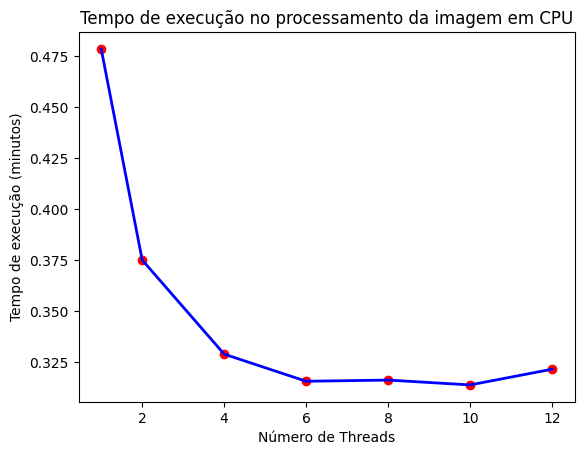

In [15]:
import matplotlib.pyplot as plt

numerodeThreads=[1,2,4,6,8,10,12]
tempodede=[0.4785658478736877,0.3750808636347453,0.32891255617141724,0.31560888290405276,0.31619791984558104,0.3138187328974406,0.3215174873669942]
plt.plot(numerodeThreads, tempodede, color='blue', linewidth=2)
plt.scatter(numerodeThreads, tempodede, marker='o', color='red')
plt.xlabel('Número de Threads')
plt.ylabel('Tempo de execução (minutos)')
plt.title('Tempo de execução no processamento da imagem em CPU')


Text(0.5, 1.0, 'Tempo de execução no processamento da imagem em GPU')

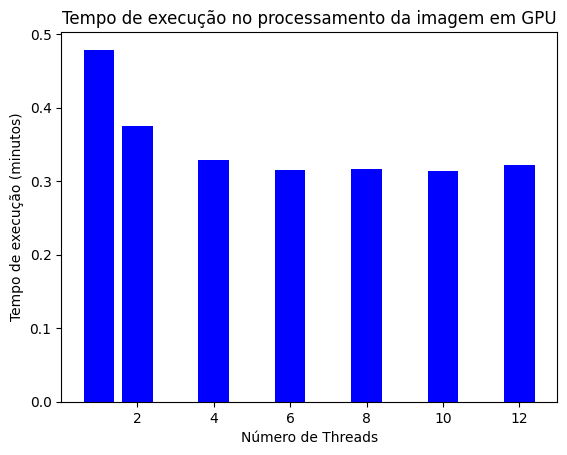

In [13]:
import matplotlib.pyplot as plt
numerodeThreads=[1,2,4,6,8,10,12]
tempodede=[0.4785658478736877,0.3750808636347453,0.32891255617141724,0.31560888290405276,0.31619791984558104,0.3138187328974406,0.3215174873669942]
plt.bar(numerodeThreads, tempodede, color='blue')
plt.xlabel('Número de Threads')
plt.ylabel('Tempo de execução (minutos)')
plt.title('Tempo de execução no processamento da imagem em GPU')

Text(0.5, 1.0, 'Tempo de execução ao aumentar os dados de treinamento, utiizando CPU')

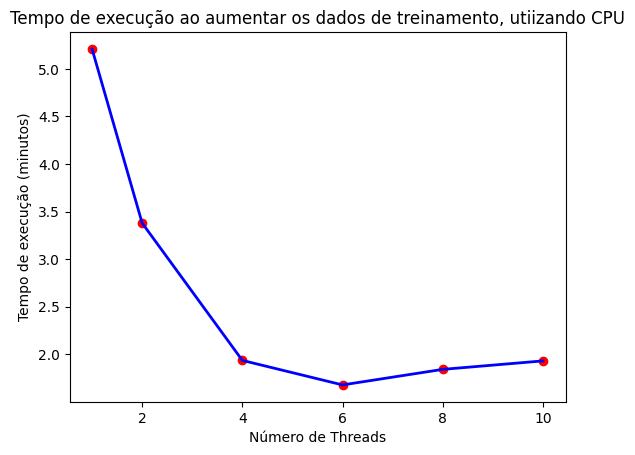

In [14]:
import matplotlib.pyplot as plt
numerodeThreads=[1,2,4,6,8,10]
tempodede=[4.2100312316438526,3.3800973296165466,1.9364452481269836,1.678802343209,1.842324729729760,1.931324729729760]
plt.plot(numerodeThreads, tempodede, color='blue', linewidth=2)
plt.scatter(numerodeThreads, tempodede, marker='o', color='red')
plt.xlabel('Número de Threads')
plt.ylabel('Tempo de execução (minutos)')
plt.title('Tempo de execução ao aumentar os dados de treinamento, utiizando CPU')

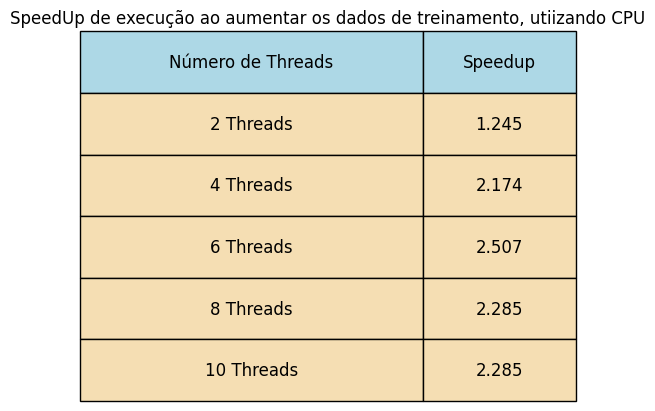

In [26]:
import matplotlib.pyplot as plt

speedup_values = [
    ["2 Threads", 1.245],
    ["4 Threads", 2.174],
    ["6 Threads", 2.507],
    ["8 Threads", 2.285],
    ["10 Threads", 2.285]
]

headers = ["Número de Threads", "Speedup"]

# Configuração das células da tabela
cell_text = [headers] + speedup_values

# Configuração das cores das células do cabeçalho e do corpo da tabela
colors = [["lightblue"] * len(headers)] + [["wheat"] * len(speedup_values[0])] * len(speedup_values)

# Criação da figura e dos eixos
fig, ax = plt.subplots()
ax.axis('off')

# Criação da tabela
table = ax.table(cellText=cell_text, cellLoc='center', cellColours=colors, bbox=[0, 0, 1, 1])

# Ajuste do tamanho das células
table.auto_set_font_size(False)
table.set_fontsize(12)

# Ajuste da largura das colunas
table.auto_set_column_width(col=list(range(len(headers))))

# Adição do título
plt.title('SpeedUp de execução ao aumentar os dados de treinamento, utiizando CPU')

# Exibição da tabela
plt.show()


In [37]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Configuração dos caminhos
diretorio_validacao = "TB_Chest_Radiography_Database/Tuberculosis"
caminho_modelo = "resnet_modelFinal.h5"

# Carregar o modelo pré-treinado
model = tf.keras.models.load_model(caminho_modelo)

# Configuração do gerador de imagens para normalização
datagen = ImageDataGenerator(rescale=1./255)

# Carregar as imagens de validação com base nos subdiretórios
img_height, img_width = 256, 256
validation_generator = datagen.flow_from_directory(
    diretorio_validacao,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Obter as previsões do modelo para as imagens de validação
y_true = validation_generator.labels
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).flatten()

# Ajustar os rótulos verdadeiros para ter o mesmo número de amostras em cada classe
num_samples_per_class = min(np.sum(y_true == 0), np.sum(y_true == 1))
indices_class_0 = np.where(y_true == 0)[0][:num_samples_per_class]
indices_class_1 = np.where(y_true == 1)[0][:num_samples_per_class]
indices_balanced = np.concatenate([indices_class_0, indices_class_1])
y_true_balanced = y_true[indices_balanced]
y_pred_balanced = y_pred[indices_balanced]

# Calcular as métricas
precision = precision_score(y_true_balanced, y_pred_balanced)
recall = recall_score(y_true_balanced, y_pred_balanced)
accuracy = accuracy_score(y_true_balanced, y_pred_balanced)
f1 = f1_score(y_true_balanced, y_pred_balanced)

# Imprimir as métricas
print("Precisão: {:.4f}".format(precision))
print("Sensibilidade (Recall): {:.4f}".format(recall))
print("Acurácia: {:.4f}".format(accuracy))
print("Escore F1: {:.4f}".format(f1))


FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: '/TB_Chest_Radiography_Database/Tuberculosis'

In [52]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

# Load the pre-trained model in .h5 format
model = tf.keras.models.load_model("resnet_modelFinal.h5")

# Directory path for tuberculosis images
tuberculosis_dir = "train2"

# Load the validation data (images)
X_validation = []
y_validation = []

# Load and preprocess the tuberculosis images
for class_dir in os.listdir(tuberculosis_dir):
    class_path = os.path.join(tuberculosis_dir, class_dir)
    if not os.path.isdir(class_path):
        continue
    
    class_label = int(class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        img = load_img(image_path, target_size=(256, 256))
        img_array = img_to_array(img) / 255.0  # Normalize the image
        X_validation.append(img_array)
        y_validation.append([class_label])  # Use a lista de rótulos para tratar como multirrótulo

# Convert the lists to arrays
X_validation = np.array(X_validation)
y_validation = np.array(y_validation)

# Transform multilabel targets into binary matrix
mlb = MultiLabelBinarizer()
y_validation = mlb.fit_transform(y_validation)

# Predict the labels using the model
y_pred_prob = model.predict(X_validation)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate the metrics
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average='macro')
recall = recall_score(y_validation, y_pred, average='macro')
f1 = f1_score(y_validation, y_pred, average='macro')
hamming_loss_val = hamming_loss(y_validation, y_pred)
jaccard_score_val = jaccard_score(y_validation, y_pred, average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Hamming Loss:", hamming_loss_val)
print("Jaccard Score:", jaccard_score_val)


184/184 [==============================] - 237s 1s/step
Accuracy: 0.9144613283250811
Precision: 0.45723066416254055
Recall: 0.5
F1-score: 0.4776598590921252
Hamming Loss: 0.0855386716749189
Jaccard Score: 0.45723066416254055


c:\Users\felipe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7744613283250811
Precision: 0.6572306641625405
Recall: 0.6
F1-score: 0.6776598590921252
